# Project 9 -Partial Correlations and Directed Acyclic Graphs
## Generating artificial data 

In [1]:
import random
import numpy as np
import pandas as pd

length = 100000
cols = ["P", "Q", "X", "Y", "Z"]
mu = 0
sigma = 5


lst_dct = {col:[] for col in cols}
for i in range(length):
    lst_dct["P"].append(25 + np.random.normal(mu, .5 * sigma))
    lst_dct["Q"].append(50 + np.random.normal(mu, sigma))
    lst_dct["X"].append(3 * lst_dct["Q"][-1]  + np.random.normal(mu, sigma ))
    lst_dct["Y"].append(lst_dct["Q"][-1] * -1 +  np.random.normal(mu, sigma))
    lst_dct["Z"].append(
        lst_dct["P"][-1] * 2 +  1.5 * lst_dct["X"][-1] -  lst_dct["Y"][-1] * 2 +  np.random.normal(mu,  sigma))

lst_dct

{'P': [24.771436633997016,
  22.978270255677227,
  23.60266882791826,
  25.466690140910593,
  24.272649700084955,
  24.821680169945,
  24.269504892117485,
  23.451636622560684,
  19.43774501236623,
  24.580978651034492,
  25.670970300790998,
  27.248589053809194,
  23.941071232921903,
  24.698176643242174,
  22.673816274838686,
  26.389678103087206,
  28.092629576424518,
  25.667785237310778,
  25.220957551374244,
  24.53733795490557,
  30.05071392670242,
  24.970171981907768,
  27.09495937302897,
  30.522213958878606,
  24.549037923768466,
  23.923562467236675,
  24.18784586041434,
  24.587727645302714,
  24.72969488542807,
  28.359857237069527,
  24.249314806250908,
  23.584538466444542,
  22.746138734123672,
  23.85980740174628,
  21.455235176526052,
  22.287641976661185,
  23.646502427580714,
  28.345318549363185,
  26.96913146118787,
  26.12319293152699,
  25.067283569574464,
  26.78517582861582,
  21.810778158962716,
  29.532430538820233,
  28.127080804333513,
  28.8646737142652,

In [4]:
df = pd.DataFrame(lst_dct)
df

,P,Q,X,Y,Z
0,24.771437,48.771820,148.977959,-52.258252,385.228498
1,22.978270,51.301223,147.557427,-46.492530,361.491499
2,23.602669,51.272900,154.772490,-46.770472,376.200938
3,25.466690,51.892999,157.295486,-52.248585,394.774112
4,24.272650,57.312441,172.063585,-48.236788,400.321557
...,...,...,...,...,...
99995,25.942141,48.701314,148.156891,-47.630493,360.832739
99996,25.671069,64.250882,189.961953,-58.048847,451.900251
99997,23.866048,40.468666,128.811724,-44.086716,331.934878
99998,21.663833,53.532167,168.475007,-57.908643,420.495085


<AxesSubplot:xlabel='Q', ylabel='Z'>

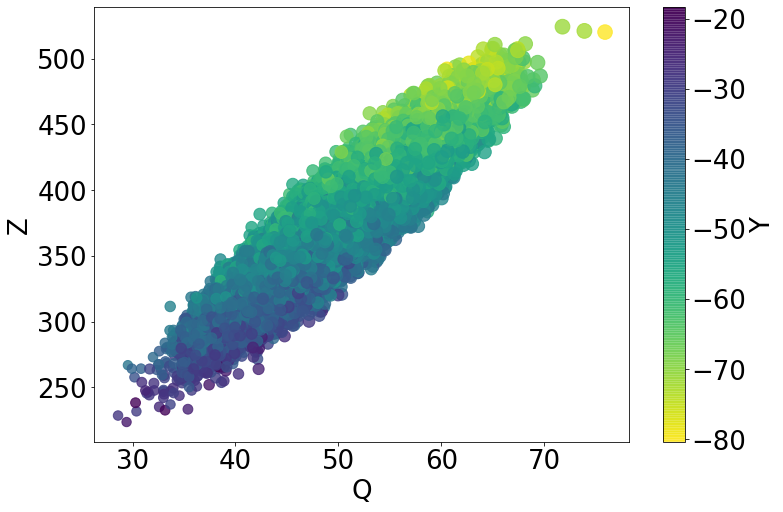

In [5]:
import matplotlib.pyplot as plt
# We can visualize the correlation of these variables on four dimensions:
#     2 dimensions in x-y space, a 3rd dimension using size and a fourth using color
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (12,8))
df.plot.scatter(x = "Q", y = "Z", c = "Y",s = "X", cmap = "viridis_r",alpha = .8, ax = ax)